<a href="https://colab.research.google.com/github/imyoungchae/YoungChaeSon/blob/main/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_Day11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#이중연결리스트
- 이중연결리스트는 각 노드가 두 개의 레퍼런스를 가지고 각각 이전 노드와 다음 노드를 가리키는 연결리스트
- 단순연결리스트는 삽입이나 삭제할 때 반드시 이전 노드를 가리키는 레퍼런스를 추가로 알아내야 하고 역방향으로 노드들을 탐색할 수 없음
- 이중연결리스트는 단순연결리스트의 이러한 단점을 보완하나, 각 노드마다 추가로 한 개 의 레퍼런스를 추가로 저장해야 한다는 단점을 가짐

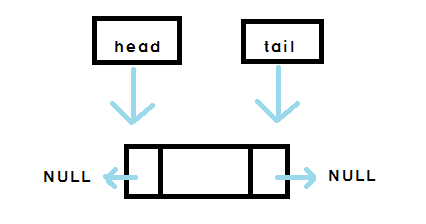

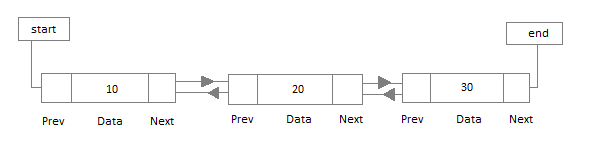

파일명: dlist.py


- insert_before()

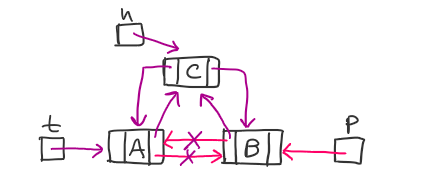

- insert_after()

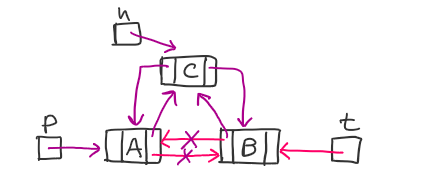

- insert_delete()

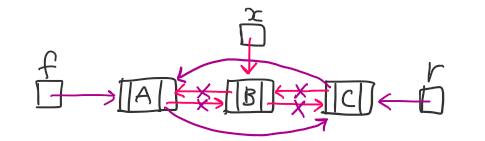

In [ ]:
class DList:
    
    class Node:
        def __init__(self, item, prev, link): # 노드 생성자
            self.item = item  
            self.prev = prev  
            self.next = link  
 
    def __init__(self):  # 이중 연결 리스트 생성자
        self.head = self.Node(None, None, None)
        self.tail = self.Node(None, self.head, None)
        self.head.next = self.tail
        self.size = 0
 
    def size(self):
        return self.size
 
    def isempty(self):
        return self.size == 0
 
    def insert_before(self, p, item):  # p가 가리키는 노드 앞에 새 노드를 삽입
        t = p.prev # p 앞의 기존 노드
        n = self.Node(item, t, p)  # 삽입할 노드
        p.prev = n  # 새 노드와 뒤 노드 연결
        t.next = n  # 새 노드와 앞 노드 연결
        self.size += 1 
 
    def insert_after(self, p, item):  # p가 가리키는 노드 뒤에 새 노드를 삽입
        t = p.next # p 뒤의 기존 노드
        n = self.Node(item, p, t)  # 삽입할 노드
        t.prev = n  # 새 노드와 뒤 노드 연결
        p.next = n  # 새 노드와 앞 노드 연결
        self.size += 1
 
    def delete(self, x):  # 노드 x 삭제
        f = x.prev # x 앞의 기존 노드
        r = x.next # x 뒤의 기존 노드
        f.next = r  # x를 건너뛰고 x의 앞뒤 노드를 연결
        r.prev = f  # x를 건너뛰고 x의 앞뒤 노드를 연결
        self.size -= 1
        return x.item
 
    def print_list(self):
        if self.isempty():
            print('리스트가 비어있음')
        else:
            p = self.head.next
            while p != self.tail:
                if p.next != self.tail:
                    print(p.item, ' <=> ', end='')
                else:
                    print(p.item)
                p = p.next  # 노드를 차례로 방문
 

파일명: main.py

In [ ]:
from dlist import DList
if __name__ == '__main__':
    s = DList()
    s.insert_after(s.head, 'apple')
    s.insert_before(s.tail, 'orange')
    s.insert_before(s.tail, 'cherry')
    s.insert_after(s.head.next, 'pear')
    s.print_list()
    print('마지막 노드 삭제 후:\t', end='')
    s.delete(s.tail.prev)
    s.print_list()
    print('맨 끝에 포도 삽입 후:\t', end='')
    s.insert_before(s.tail, 'grape')
    s.print_list()
    print('첫 노드 삭제 후:\t', end='')
    s.delete(s.head.next)
    s.print_list()
    print('첫 노드 삭제 후:\t', end='')
    s.delete(s.head.next)
    s.print_list()
    print('첫 노드 삭제 후:\t', end='')
    s.delete(s.head.next)
    s.print_list()
    print('첫 노드 삭제 후:\t', end='')
    s.delete(s.head.next)
    s.print_list()


#원형연결리스트
- 원형연결리스트는 마지막 노드와 첫 노드가 연결된 단순연결리스트
- 마지막 노드와 첫 노드를 O(1) 시간에 방문할 수 있는 장점
- 무한 루프 발생가능하다는 단점

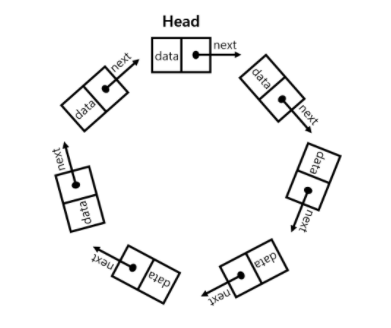

파일명:clist.py

- insert()

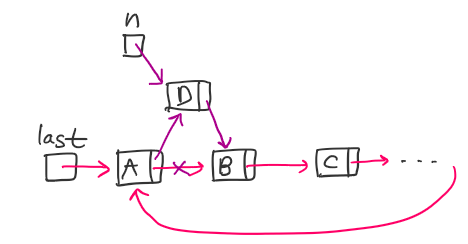

- delete()

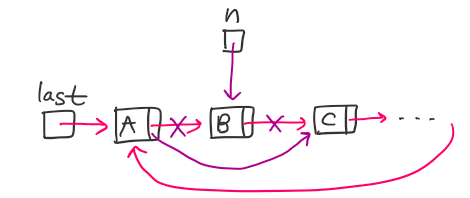

In [ ]:
class CList:
    class Node:
        def __init__(self, item, link):  
            self.item = item  
            self.next = link  

    def __init__(self):  
        self.last = None
        self.size = 0

    def no_items(self):
        return self.size

    def is_empty(self):
        return self.size == 0

    def insert(self, item):  # 새 항목을 연결 리스트의 첫 노드로 삽입
        n = self.Node(item, None)  # 새 항목을 저장할 노드를 생성하여 n이 참조
        if self.is_empty():  # 연결 리스트가 empty인 경우
            n.next = n  # 새 노드는 자신을 참조
            self.last = n  # last는 새 노드를 참조
        else:
            n.next = self.last.next  # 새 노드는 첫 노드를 참조
            self.last.next = n  # last가 참조화는 노드와 새 노드 연결
        self.size += 1

    def first(self):
        if self.is_empty():
            raise EmptyError('Underflow')
        f = self.last.next
        return f.item

    def delete(self):  # 연결 리스트의 첫 노드를 삭제
        if self.is_empty():
            raise EmptyError('Underflow')
        x = self.last.next
        if self.size == 1:  # 연결 리스트에 노드가 1개인 경우
            self.last = None  # empty 리스트가 됨
        else:  # 노드가 2개 이상인 경우
            self.last.next = x.next  # last가 참조하는 노드가 두번째 노드를 연결
        self.size -= 1
        return x.item

    def print_list(self):
        if self.is_empty():
            print('List is empty.')
        else:
            f = self.last.next
            p = f
            while p.next != f:  # 첫 노드를 다시 방문하면 중단
                print(p.item, ' -> ', end='')
                p = p.next  # 노드를 차례로 방문
            print(p.item)

class EmptyError(Exception):  # Underflow시 에러 처리
    pass

파일명:clist_main.py

In [ ]:
from clist import CList
if __name__ == '__main__':
    s = CList()
    s.insert('pear')
    s.insert('cherry')
    s.insert('orange')
    s.insert('apple')
    s.print_list()
    print('s의 길이 =', s.no_items())
    print('s의 첫 항목 :', s.first())
    s.delete()
    print('첫 노드 삭제 후: ', end='')
    s.print_list()
    print('s의 첫 길이 =', s.no_items())
    print('s의 첫 항목 :', s.first())
    s.delete()
    print('첫 노드 삭제 후: ', end='')
    s.print_list()
    s.delete()
    print('첫 노드 삭제 후: ', end='')
    s.print_list()
    s.delete()
    print('첫 노드 삭제 후: ', end='')
    s.print_list()


[파이썬기초/알고리즘/자료구조 공부하기 좋은 블로그](https://it-garden.tistory.com/)